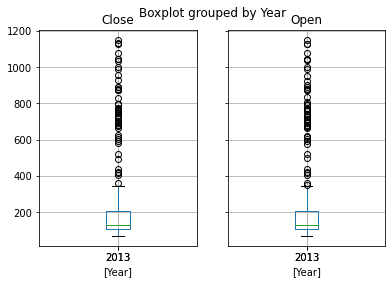

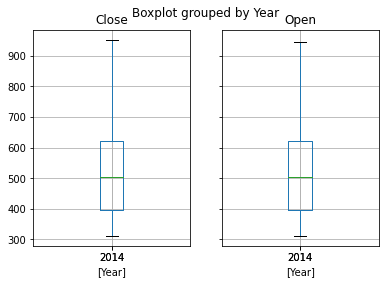

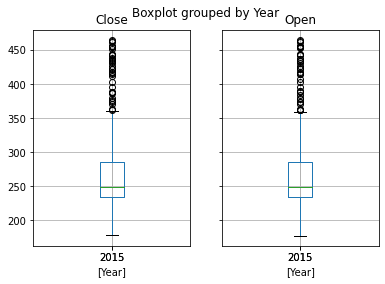

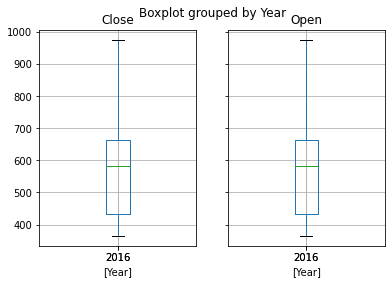

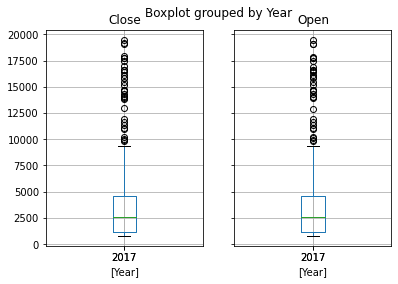

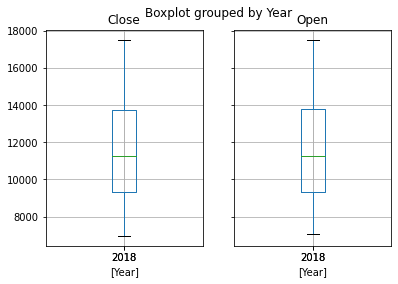

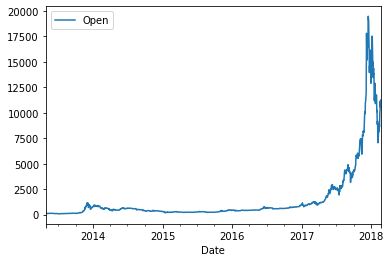

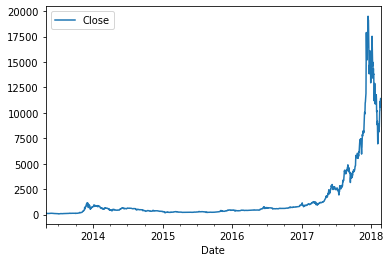

In [ ]:
%run bitcoin.ipynb

In [ ]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the data into a pandas dataframe. If True and parse_dates is enabled, pandas will attempt 
#to infer the format of the datetime strings in the columns, and if it can be inferred, 
#switch to a faster method of parsing them.
crypto_data = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'])

In [ ]:
#prints the first 5 rows of the data
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000"
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000"


In [ ]:
#Defining the code to perform Simple Moving Average with a window of size 3
for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,4]+ df.iloc[i+1,4] +df.iloc[i+2,4])/3),1)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,SMA_3,pandas_SMA_3,SMA_4
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000",NaN,NaN,NaN
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000",NaN,NaN,NaN
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000",11060.3,10969.266667,NaN
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000",10963.3,10627.833333,10778.8
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000",10632.8,10488.866667,10504.8


In [ ]:
#the pandas in-built rolling function to perform SMA wit window size of 3
df['pandas_SMA_3'] = df.iloc[:,4].rolling(window=3).mean()

In [ ]:
#the pandas in-built rolling function matches with our custom python 
#based simple moving average, which means implementation of SMA was correct.
df.head()


,Date,Open,High,Low,Close,Volume,Market Cap,SMA_3,pandas_SMA_3
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000",NaN,NaN
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000",NaN,NaN
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000",11060.3,11060.266667
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000",10963.3,10963.266667
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000",10632.8,10632.800000


In [ ]:
#Defining the code to perform Simple Moving Average with a window of size 4
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,4]+ df.iloc[i+1,4] +df.iloc[i+2,4]+df.iloc[i+3,4])/4),1)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,SMA_3,pandas_SMA_3,SMA_4
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000",NaN,NaN,NaN
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000",NaN,NaN,NaN
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000",11060.3,11060.266667,NaN
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000",10963.3,10963.266667,11073.4
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000",10632.8,10632.800000,10780.9


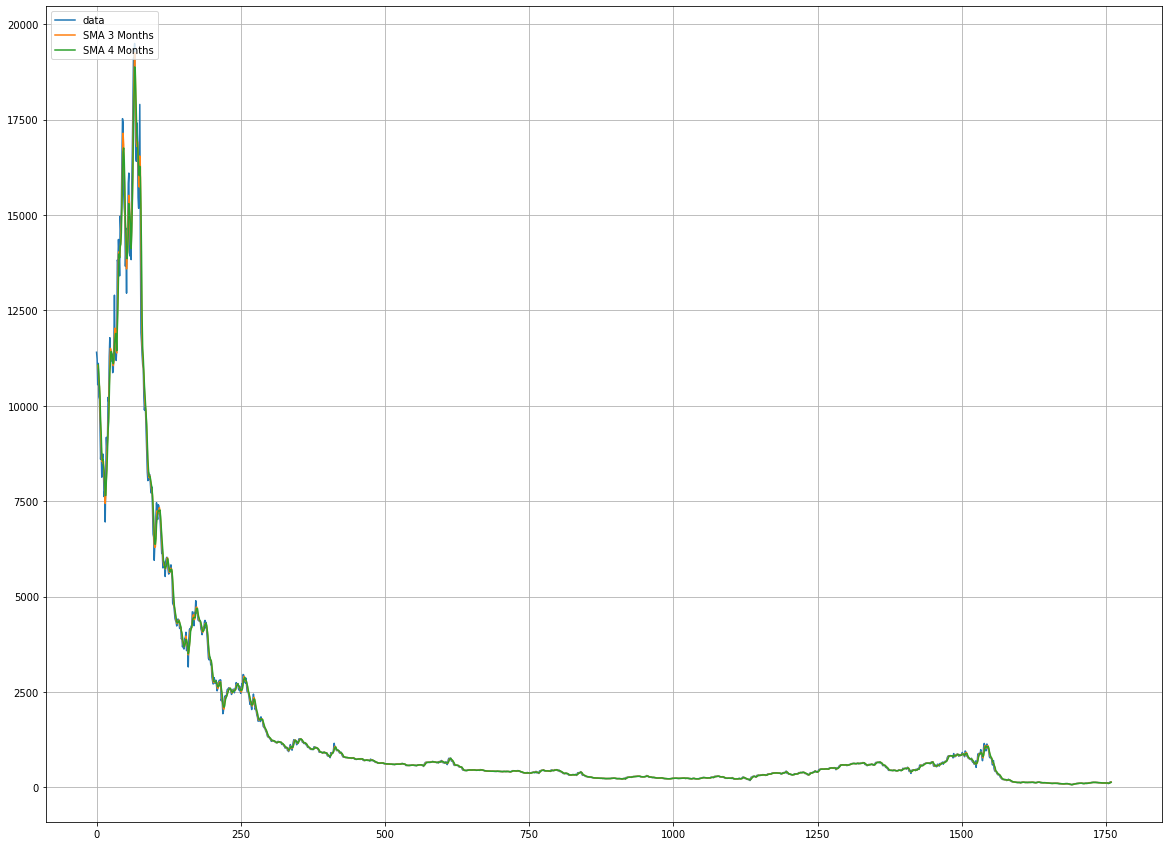

In [ ]:

plt.figure(figsize=[20,15])
plt.grid(True)
plt.plot(df['Close'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

In [ ]:
#Function to find the Mean Squared Error
def findMSE(n):
  sum = 0
  for i in range(df.shape[0]):
    if(math.isnan(df.iloc[i,n])== False and math.isnan(df.iloc[i,4])==False):
      sum = sum + (df.iloc[i,n]- df.iloc[i,4])**2
    

  print("MSE: ", (sum/df.shape[0]))

#MSE of the 4 day window
findMSE(9)

MSE:  49751.045304772844


In [ ]:
df['pandas_SMA_50'] = df.iloc[:,4].rolling(window=50).mean()

In [ ]:
#prints the first 100 rows of the data
df.head(100)

,Date,Open,High,Low,Close,Volume,Market Cap,SMA_3,pandas_SMA_3,SMA_4
0,2018-02-20,11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000",NaN,NaN,NaN
1,2018-02-19,10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000",NaN,NaN,NaN
2,2018-02-18,11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000",11060.3,11060.266667,NaN
3,2018-02-17,10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000",10963.3,10963.266667,11073.4
4,2018-02-16,10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000",10632.8,10632.800000,10780.9
...,...,...,...,...,...,...,...,...,...,...
95,2017-11-17,7853.57,8004.59,7561.09,7708.99,"4,651,670,000","131,026,000,000",7845.2,7845.210000,7934.1
96,2017-11-16,7323.24,7967.38,7176.58,7871.69,"5,123,810,000","122,164,000,000",7790.3,7790.276667,7851.8
97,2017-11-15,6634.76,7342.25,6634.76,7315.54,"4,200,880,000","110,667,000,000",7632.1,7632.073333,7671.6
98,2017-11-14,6561.48,6764.98,6461.75,6635.75,"3,197,110,000","109,434,000,000",7274.3,7274.326667,7383.0


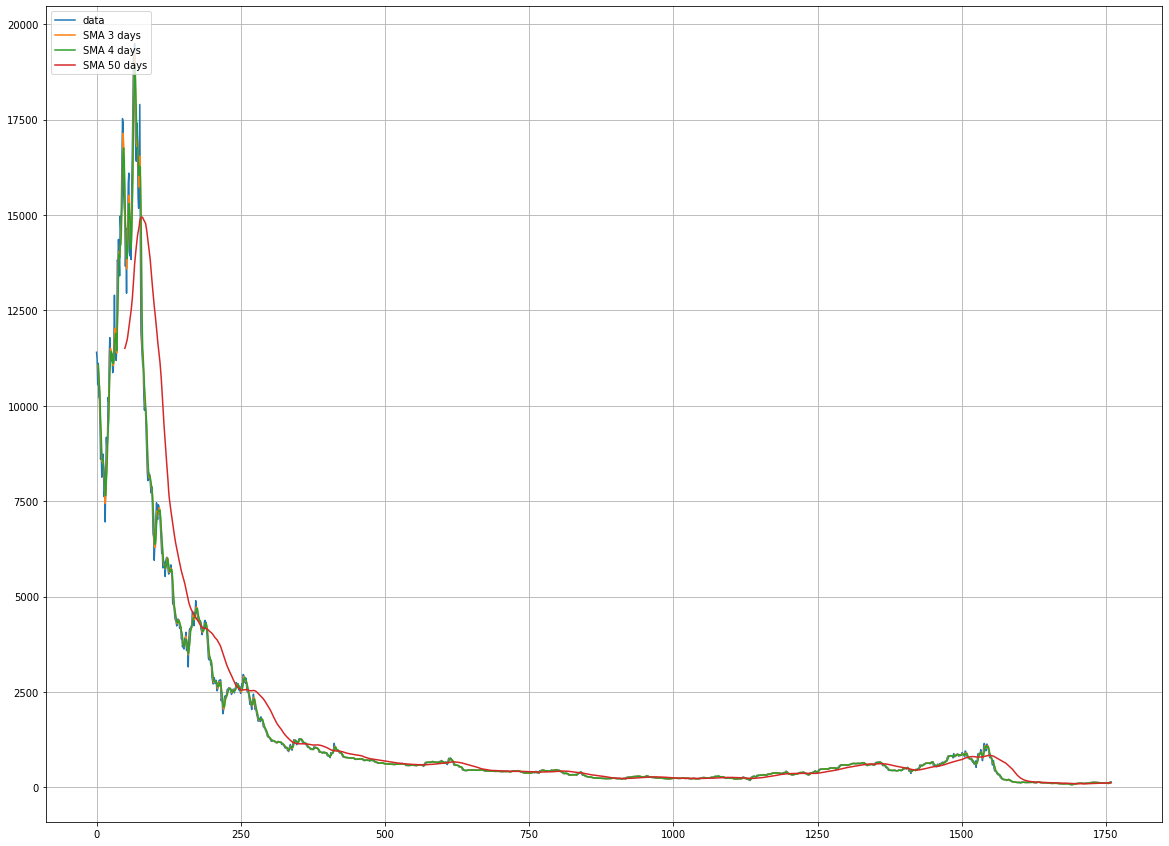

In [ ]:
plt.figure(figsize=[20,15])
plt.grid(True)
plt.plot(df['Close'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 days')
plt.plot(df['SMA_4'],label='SMA 4 days')
plt.plot(df['pandas_SMA_50'],label='SMA 50 days')
plt.legend(loc=2)

In [ ]:
#MSE of SMA 50 day window
findMSE(10)


MSE:  890886.2098412267


In [ ]:
#MSE of SMA 3 day window
findMSE(7)

MSE:  31460.408568409068


In [ ]:
#the pandas in-built rolling function to perform SMA wit window size of 10
df['pandas_SMA_10'] = df.iloc[:,4].rolling(window=10).mean()

In [ ]:
#the pandas in-built rolling function to perform SMA wit window size of 15
df['pandas_SMA_15'] = df.iloc[:,4].rolling(window=15).mean()

In [ ]:
#the pandas in-built rolling function to perform SMA wit window size of 20
df['pandas_SMA_20'] = df.iloc[:,4].rolling(window=20).mean()

In [ ]:
#prints the first 100 rows of the data
df.head(100)

,Date,Open,High,Low,Close,Volume,Market Cap,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_50,pandas_SMA_10,pandas_SMA_15,pandas_SMA_20
0,2018-02-20,11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-19,10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-18,11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000",11060.3,11060.266667,NaN,NaN,NaN,NaN,NaN
3,2018-02-17,10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000",10963.3,10963.266667,11073.4,NaN,NaN,NaN,NaN
4,2018-02-16,10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000",10632.8,10632.800000,10780.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-11-17,7853.57,8004.59,7561.09,7708.99,"4,651,670,000","131,026,000,000",7845.2,7845.210000,7934.1,13469.3154,8247.501,8896.664667,9685.6585
96,2017-11-16,7323.24,7967.38,7176.58,7871.69,"5,123,810,000","122,164,000,000",7790.3,7790.276667,7851.8,13278.1592,8101.615,8689.737333,9364.6680
97,2017-11-15,6634.76,7342.25,6634.76,7315.54,"4,200,880,000","110,667,000,000",7632.1,7632.073333,7671.6,13112.4860,7954.077,8495.200000,9134.6100
98,2017-11-14,6561.48,6764.98,6461.75,6635.75,"3,197,110,000","109,434,000,000",7274.3,7274.326667,7383.0,12941.1810,7792.283,8278.342667,8883.5375


In [ ]:
#MSE of SMA 10 day window
findMSE(11)

MSE:  153040.81003464048


In [ ]:
#MSE of SMA 15 day window
findMSE(12)

MSE:  255812.67791225223


In [ ]:
#MSE of SMA 20 day window
findMSE(13)

MSE:  353026.91411595943


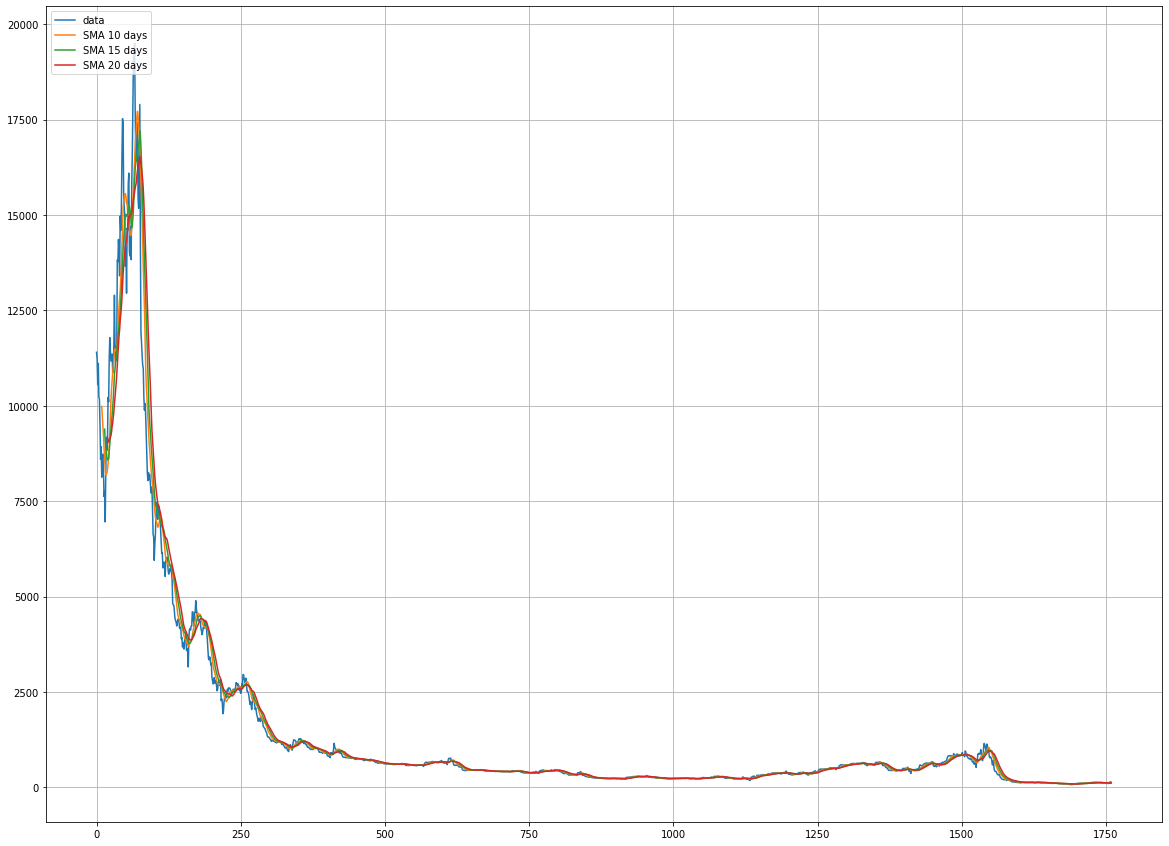

In [ ]:
plt.figure(figsize=[20,15])
plt.grid(True)
plt.plot(df['Close'],label='data')
plt.plot(df['pandas_SMA_10'],label='SMA 10 days')
plt.plot(df['pandas_SMA_15'],label='SMA 15 days')
plt.plot(df['pandas_SMA_20'],label='SMA 20 days')
plt.legend(loc=2)